In [1]:
import io
from io import StringIO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import pandas as pd
# Import the dataset
df = pd.read_csv("./student_scores.csv")
#df.head()
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Shape of dataset
print("Shape of Training dataset:", df.shape)

Shape of Training dataset: (25, 2)


In [4]:
# Information about the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Describe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


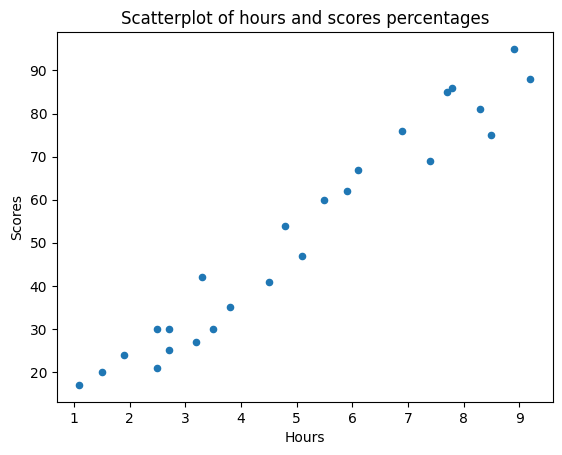

In [6]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');


In [7]:
X = df.iloc[:,0:1]
X = np.nan_to_num(X)
# -1 means last column
Y = df.iloc[:,-1]
 

In [8]:
n_rows = df.shape[0]

XX=df['Hours'].to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
XX = np.concatenate((ones, XX), axis=1)
YY=df['Scores'].to_numpy().reshape(n_rows,1)

In [9]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [10]:
compute_cost(XX,YY)

array([1632.02])

In [11]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
#         print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [12]:
%%time
num_iterations=1500
theta_init=np.array([[1],[1]])
alpha=0.01
theta, J_history, theta0_history, theta1_history = gradient_descent(XX,YY, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 273 ms, sys: 4.98 ms, total: 278 ms
Wall time: 102 ms


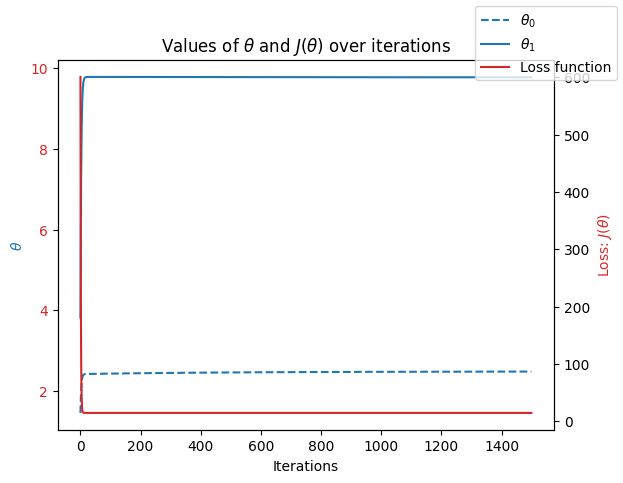

In [13]:
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


To dig further into what is happening to our model, we can look at a metric that measures the model in a different way, it doesn't consider our individual data values such as MSE, RMSE and MAE, but takes a more general approach to the error, the R² 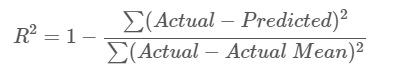



In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('train R2', model.score(x_train,y_train))
print('test R2', model.score(x_test,y_test))

train R2 0.9515510725211552
test R2 0.9454906892105356


In [16]:
#Coefficients
print(model.intercept_)
print(model.coef_)

2.018160041434683
[9.91065648]


In [17]:
from sklearn.metrics import mean_squared_error
print('mean squared error for training set', mean_squared_error(y_train, model.predict(x_train)))
print('mean squared error for test set', mean_squared_error(y_test, model.predict(x_test)))

mean squared error for training set 30.89818237731452
mean squared error for test set 21.5987693072174


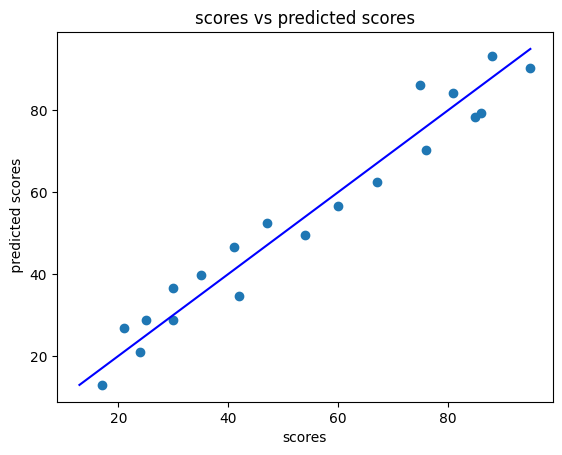

In [18]:
#Visualizing the difference between actual and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred)
p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel("scores")
plt.ylabel(" predicted scores")
plt.title("scores vs predicted scores")
plt.show()

In [70]:
df = pd.read_csv("./HousingData.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [71]:
X = df.iloc[:,0:13]
X = np.nan_to_num(X)
# -1 means last column
Y = df.iloc[:,-1]
X = scale(X)
Y=scale(Y)
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
x_train.shape

(404, 13)

In [72]:
sgdr = SGDRegressor(loss='squared_error',alpha=0.0001, epsilon=0.01, eta0=0.01 fit_intercept=True,
       learning_rate='invscaling', loss='squared_loss', n_iter=5, p=0.1,
       verbose=0)
print(sgdr)

SGDRegressor()


In [73]:
sgdr.fit(x_train, y_train)
score = sgdr.score(x_train, y_train)
print("R-squared:", score)

R-squared: 0.7572787889557453


MSE:  0.4383347443237775
RMSE:  0.6620685344613332


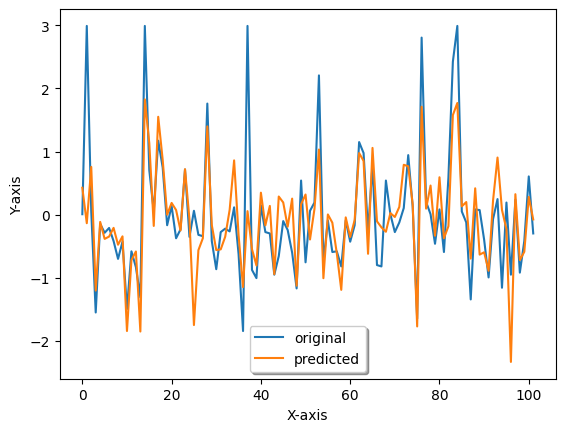

In [74]:
y_pred = sgdr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

In [75]:
xx=df.loc[:,['LSTAT','PTRATIO','RM']]
yy=df['MEDV']

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# To scale data
sc.fit(xx)



StandardScaler()

In [77]:
def cost_fun(theta,X,Y):
    m=len(X)
    J=(1/(2*m))*(np.sum(np.square(np.dot(X,theta)-Y)))
    return J

In [78]:
def gradient_descent(X,Y,alpha,iteration,lamb):
    cl=[]
    m=len(X)
    n=X.shape[1]
    theta=np.random.randn(n)
    tl=[theta]
    for i in range(iteration):
        theta=(1-(alpha/lamb))*theta-alpha*(1/m)*np.sum(np.dot(X.T,((np.dot(X,theta)-Y))))
        j=cost_fun(theta,X,Y)
        cl.append(j)
        tl.append(theta)
    return cl,tl 

In [79]:
cost_list,theta_list=gradient_descent(X,Y,0.001,1000,100)

In [80]:
a=theta_list[-1]

(0.0, 1000.0)

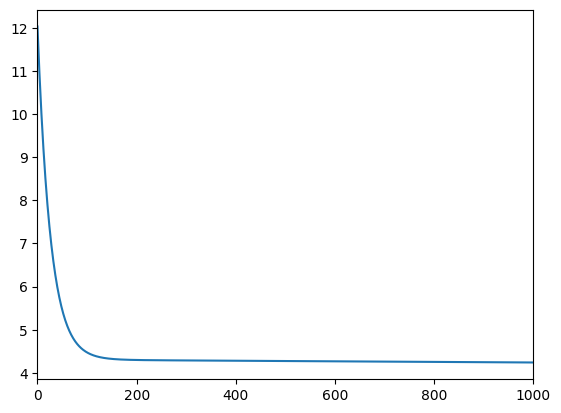

In [81]:
plt.plot(cost_list)
plt.xlim([0,1000])



In [89]:
pred_array=np.array([1.13081,0.0000,8.14000,0.0000,0.53800,5.71300,94.10000,4.23300,4.0000,397.00000,21.0000,360.17000,22.60000]).reshape(1, -1)
sgdr.predict(pred_array)

array([-17.09014235])